In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# YOLO 라벨 파일에서 바운딩 박스 정보 읽기
def load_yolo_annotations(label_file_path):
    yolo_annotations = []
    with open(label_file_path, 'r') as file:
        for line in file:
            yolo_annotations.append(line.strip())
    return yolo_annotations

# 폴더 내 모든 이미지와 라벨을 처리
def process_folder(image_folder_path, label_folder_path):
    # 이미지 폴더 내 모든 파일 탐색
    for image_name in os.listdir(image_folder_path):
        # 이미지 경로와 라벨 경로 설정
        image_path = os.path.join(image_folder_path, image_name)
        label_file_path = os.path.join(label_folder_path, os.path.splitext(image_name)[0] + ".txt")
        
        # 이미지와 라벨 파일이 존재하는지 확인
        if os.path.isfile(image_path) and image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            if not os.path.isfile(label_file_path):
                print(f"라벨 파일이 없습니다: {label_file_path}")
                continue
            
            try:
                # 바운딩 박스 시각화
                plot_yolo_bboxes_from_file(image_path, label_file_path)

                # 사용자 입력 대기 (Enter 키로 다음 이미지)
                input("다음 이미지를 보려면 Enter 키를 누르세요...")

            except Exception as e:
                print(f"{image_name} 처리 중 오류 발생: {e}")

# 이미지와 라벨을 시각화
def plot_yolo_bboxes_from_file(image_path, label_file_path):
    # 이미지 열기
    img = Image.open(image_path)
    image_width, image_height = img.size
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # YOLO 라벨 파일에서 바운딩 박스 정보 읽기
    yolo_annotations = load_yolo_annotations(label_file_path)

    # 각 바운딩 박스를 이미지에 그리기
    for annotation in yolo_annotations:
        class_id, x_center, y_center, width, height = map(float, annotation.split())

        # YOLO 형식을 절대 좌표로 변환
        x_min = (x_center - width / 2) * image_width
        y_min = (y_center - height / 2) * image_height
        bbox_width = width * image_width
        bbox_height = height * image_height

        # 사각형 패치 추가
        rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # 클래스 ID 표시
        plt.text(x_min, y_min, f'Class {int(class_id)}', color='white',
                 fontsize=12, bbox=dict(facecolor='red', edgecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

라벨 파일이 없습니다: C:/Users/windows11/study/yolo_dataset/labels/1\chemistry glass apparatus_1.txt


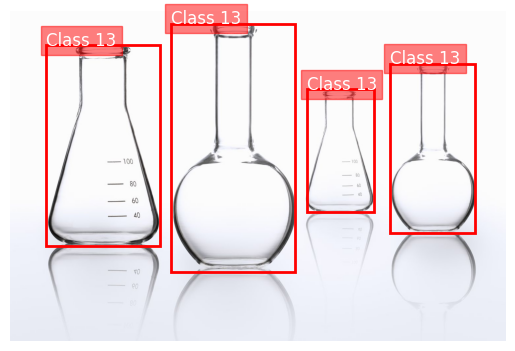

KeyboardInterrupt: Interrupted by user

In [14]:
# 예제 파일 경로
image_folder_path  = "C:/Users/windows11/study/yolo_dataset/images/1"
label_folder_path = "C:/Users/windows11/study/yolo_dataset/labels/1"

# 시각화 함수 호출
process_folder(image_folder_path, label_folder_path)


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# YOLO 라벨 파일에서 바운딩 박스 정보 읽기
def load_yolo_annotations(label_file_path):
    yolo_annotations = []
    with open(label_file_path, 'r') as file:
        for line in file:
            yolo_annotations.append(line.strip())
    return yolo_annotations

# 바운딩 박스 시각화 및 저장
def plot_and_save_yolo_bboxes(image_path, label_file_path, output_folder):
    # 이미지 열기
    img = Image.open(image_path)
    image_width, image_height = img.size
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # YOLO 라벨 파일에서 바운딩 박스 정보 읽기
    yolo_annotations = load_yolo_annotations(label_file_path)

    # 각 바운딩 박스를 이미지에 그리기
    for annotation in yolo_annotations:
        class_id, x_center, y_center, width, height = map(float, annotation.split())

        # YOLO 형식을 절대 좌표로 변환
        x_min = (x_center - width / 2) * image_width
        y_min = (y_center - height / 2) * image_height
        bbox_width = width * image_width
        bbox_height = height * image_height

        # 사각형 패치 추가
        rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # 클래스 ID 표시
        plt.text(x_min, y_min, f'Class {int(class_id)}', color='white',
                 fontsize=12, bbox=dict(facecolor='red', edgecolor='red', alpha=0.5))

    plt.axis('off')

    # 결과 이미지 저장
    os.makedirs(output_folder, exist_ok=True)  # 출력 폴더 생성
    output_file_path = os.path.join(output_folder, os.path.basename(image_path))
    plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # 플롯 닫기
    print(f"저장 완료: {output_file_path}")

# 폴더 내 모든 이미지와 라벨을 처리
def process_folder(image_folder_path, label_folder_path, output_folder):
    for image_name in os.listdir(image_folder_path):
        # 이미지 경로와 라벨 경로 설정
        image_path = os.path.join(image_folder_path, image_name)
        label_file_path = os.path.join(label_folder_path, os.path.splitext(image_name)[0] + ".txt")
        
        # 이미지와 라벨 파일이 존재하는지 확인
        if os.path.isfile(image_path) and image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            if not os.path.isfile(label_file_path):
                print(f"라벨 파일이 없습니다: {label_file_path}")
                continue
            
            try:
                # 바운딩 박스 시각화 및 결과 저장
                plot_and_save_yolo_bboxes(image_path, label_file_path, output_folder)

            except Exception as e:
                print(f"{image_name} 처리 중 오류 발생: {e}")

# 경로 설정
image_folder_path = "C:/Users/windows11/study/yolo_dataset/images/1"  # 원본 이미지 경로
label_folder_path = "C:/Users/windows11/study/yolo_dataset/images/1"  # YOLO 라벨 경로
output_folder = "C:/Users/windows11/study/yolo_dataset/results/1"    # 결과 이미지 저장 경로

# 폴더 내 모든 이미지 처리
process_folder(image_folder_path, label_folder_path, output_folder)

저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_1.jpg
저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_10.jpg
라벨 파일이 없습니다: C:/Users/windows11/study/yolo_dataset/images/1\chemistry glass apparatus_100.txt
라벨 파일이 없습니다: C:/Users/windows11/study/yolo_dataset/images/1\chemistry glass apparatus_101.txt
저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_102.jpg
저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_103.jpg
저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_104.jpg
저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_105.jpg
저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_106.jpg
라벨 파일이 없습니다: C:/Users/windows11/study/yolo_dataset/images/1\chemistry glass apparatus_107.txt
저장 완료: C:/Users/windows11/study/yolo_dataset/results/1\chemistry glass apparatus_108.jpg
라벨 파일이 없습